In [1]:
import os
import datetime

# 打印时间
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print('\n' + '======'*8 + '%s'%nowtime)

# mac系统上pytorch和matplotlib在jupyter中同时跑需要更改环境变量
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE' # 避免jupyter Notebook老是服务会挂掉

在Pytorch中构建图片数据管道通常有三种方法。

第一种是使用 torchvision中的datasets.ImageFolder来读取图片然后用 DataLoader来并行加载。

第二种是通过继承 torch.utils.data.Dataset 实现用户自定义读取逻辑然后用 DataLoader来并行加载。

第三种方法是读取用户自定义数据集的通用方法，既可以读取图片数据集，也可以读取文本数据集。

本篇我们介绍第一种方法。


In [2]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets

In [10]:
# 将图片转化为tensor格式
transforms_train = transforms.Compose([transforms.ToTensor()])
transforms_valid = transforms.Compose([transforms.ToTensor()])

In [ ]:
# ImageFolder对于原始数据集的保存存在要求，每个文件夹下面存贮同一类别的图片，文件夹的名字为分类的名字
# transform对PIL Image进行转换操作，transform输入的是loader读取图片返回的对象 如果不转变，则返回的是PIL Image对象
# target_transform 对label进行变换

In [13]:
ds_train = datasets.ImageFolder('../eat_pytorch_in_20_days-master/eat_pytorch_in_20_days-master/data/cifar2/train/',
                                transform = transforms_train, target_transform= lambda t: torch.tensor([t]).float())
ds_valid = datasets.ImageFolder('../eat_pytorch_in_20_days-master/eat_pytorch_in_20_days-master/data/cifar2/test/',
                                transform = transforms_train, target_transform= lambda t: torch.tensor([t]).float())
print(ds_train.class_to_idx)
print(ds_train[0][0])

{'0_airplane': 0, '1_automobile': 1}
tensor([[[0.7843, 0.7922, 0.7961,  ..., 0.8078, 0.8039, 0.7961],
         [0.8235, 0.8118, 0.8157,  ..., 0.8235, 0.8196, 0.8157],
         [0.8314, 0.8157, 0.8314,  ..., 0.8353, 0.8314, 0.8235],
         ...,
         [0.8588, 0.8353, 0.7569,  ..., 0.9412, 0.9333, 0.9255],
         [0.8314, 0.8510, 0.8510,  ..., 0.9686, 0.9569, 0.9294],
         [0.8667, 0.8667, 0.8627,  ..., 0.9333, 0.9451, 0.9255]],

        [[0.7922, 0.8000, 0.8039,  ..., 0.8118, 0.8078, 0.8000],
         [0.8314, 0.8196, 0.8235,  ..., 0.8275, 0.8235, 0.8196],
         [0.8392, 0.8235, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8588, 0.8353, 0.7569,  ..., 0.9412, 0.9333, 0.9255],
         [0.8314, 0.8510, 0.8510,  ..., 0.9686, 0.9569, 0.9294],
         [0.8667, 0.8667, 0.8627,  ..., 0.9333, 0.9451, 0.9255]],

        [[0.7725, 0.7804, 0.7843,  ..., 0.7922, 0.7882, 0.7804],
         [0.8118, 0.8000, 0.8039,  ..., 0.8078, 0.8039, 0.8000],
         [0.8275, 0.8

In [14]:
# 这一步是将数据变化成可迭代的张量通道
"""
shuffle=True 数据将会在每个epoch之后，进行打乱重新排序
num_workers 定义加载数据的线程数，默认为0，意味着只使用主线程加载数据
"""
# 值得注意得是，这个与1-1对比可知，DataLoader需要加载两组张量数据，包括数据本身和label
dl_train = DataLoader(ds_train, batch_size=50, shuffle=True, num_workers=3)
dl_valid = DataLoader(ds_valid, batch_size=50, shuffle=True, num_workers=3)

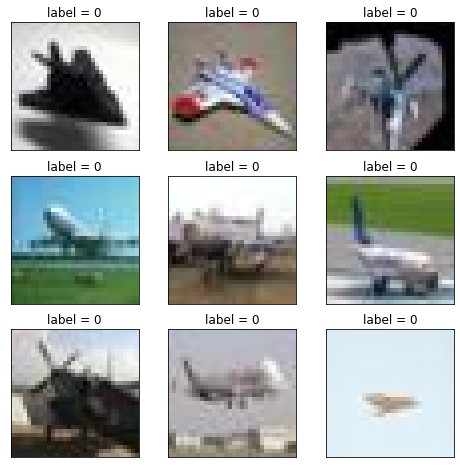

In [24]:
%matplotlib inline
%config InlineBackend.figure_fomat = 'svg' # 在默认设置的matplotlib中图片分辨率不是很高，可以通过设置矢量图的方式来提高图片显示质量

# 查看部分样本
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for i in range(9):
    img, label = ds_train[i]
    # permute是torch中的函数 将tensor的维度换位，参数是一系列的整数，代表原来张量的维度
    # 比如图片的size是（28，28，3），就可以利用img.permute（2，0，1）得到一个size为（3，28，28）的tensor
    img = img.permute(1,2,0)
    # subplot有多种用法 图中所示为 subplot（nrows， ncols， index）
    ax = plt.subplot(3,3,i+1) # 添加子图
    ax.imshow(img.numpy())
    ax.set_title('label = %d'%label.item())
    # 将坐标轴设置为空白的方法
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


